# 08 - 1

In [3]:
## 합성곱

In [4]:
# 예를 들어 뉴런이 3개의 가중치를 가진다면
# 가중치 w1 ~ w3 이 처음 3개 [0,1,2]와 곱해져 1개의 출력을 만듬
# 그리고 w1 ~ w3 (가중치는 그대로)가 다음 3개 [1,2,3]와 곱해쳐 1개의 출력을 만듬
# 만약 10개의 입력층이 있다면 합성곱의 결과는 8개의 출력이 나옴
# 합성곱 신경망에서는 완전 연결 신경망과 달리 뉴런을 필터 혹은 커널이라고 부름
# 여기서는 뉴런 개수를 이야기할 때는 필터, 가중치를 의미할 때는 커널이라고 부름
# 합성곱은 2차원 이상에서도 적용 가능
# 입력과 같은 차원의 필터를 가짐
# 필터가 여러 개면 한 차원 높은 출력물(최대 3차원, 3차원은 -> 3차원 그대로고 깊이가 더 깊어짐)이 나오고 필터의 개수가 깊이가 됨

In [5]:
## 케라스 합성곱

In [6]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu')
# 첫 번째 매개변수는 커널의 개수, 두 번째는 커널의 사이즈, 세 번째는 활성화 함수

In [7]:
# 일반적으로 1개 이상의 합성곱 층을 쓴 인공 신경망을 합성곱 신경망이라 부름

In [8]:
# (4, 4) 크기의 입력에 (3, 3) 크기의 커널을 적용하면 (2, 2) 크기의 특성 맵이 만들어지는데 만약 출력의 크기를 입력과 동일하게 만드려면?
# 그렇다면 더 큰 입력에 합성곱 하는 척을 해야해서 패딩을 줌
# 입력과 특성 맵의 크기를 동일하게 만들기 위해 패딩 하는 것을 세임 패딩
# 패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우를 밸리드 패딩이라 하고, 이는 특성 맵의 크기가 필연적으로 줄어들 수 밖에 없음
# 패딩을 하는 이유는 이미지의 주변에 있는 정보를 잃어버리지 않도록 도와주는 역할
# 일반적인 합성곱 신경망에서는 세임 패딩이 주로 사용됨
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')

In [9]:
# 커널의 이동 크기를 스트라이드라고 부름
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)
# 하지만 1보다 큰 스트라이드를 사용하는 경우는 드물고 대부분 기본값을 그대로 사용함

In [10]:
# 풀링은 합성곱 층에서 만든 특성 맵의 크기를 줄이는 역할 (특성 맵의 개수를 줄이지는 않음)
# 최대 풀링은 그 영역에서 가장 큰 값을 고르는 것
# 평균 풀링은 그 영역에서 평균값을 계산한 것
keras.layers.MaxPooling2D(2, strides=2, padding='valid')
# 첫 번째 매개변수는 풀링의 크기, 스트라이드는 기본적으로 풀링의 크기이므로 지정 할 필요는 없음, 풀링은 패딩을 하지 않기에 기본적으로 valid 임
# 평균 풀링은 AveragePooling2D

# 08 - 2

In [11]:
# 실습을 할 건데
# 완전 연결 신경망에서는 밀집층에 연결하기 위해 Flatten이나 reshape()을 해야했지만 여기서는 2차원 그대로 사용 가능
# 하지만 입력 이미지는 항상 깊이가 있어야 함

In [12]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [13]:
# 원래 (48000, 28, 28) 인 train_input이 (48000, 28, 28, 1) 크기가 되었음

In [14]:
## 합성곱 신경망 만들기

In [15]:
# 합성곱 층은 Conv2D로 추가함
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [16]:
# 풀링 층은 MaxPooling2D와 AveragePooling2D로 추가함
model.add(keras.layers.MaxPooling2D(2))

In [17]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [18]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

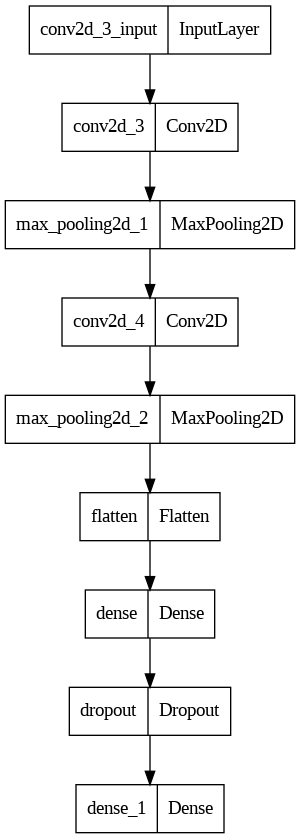

In [20]:
# utils의 plot_model() 함수를 통해서 층의 구성을 그림으로 표현해 줌
keras.utils.plot_model(model)

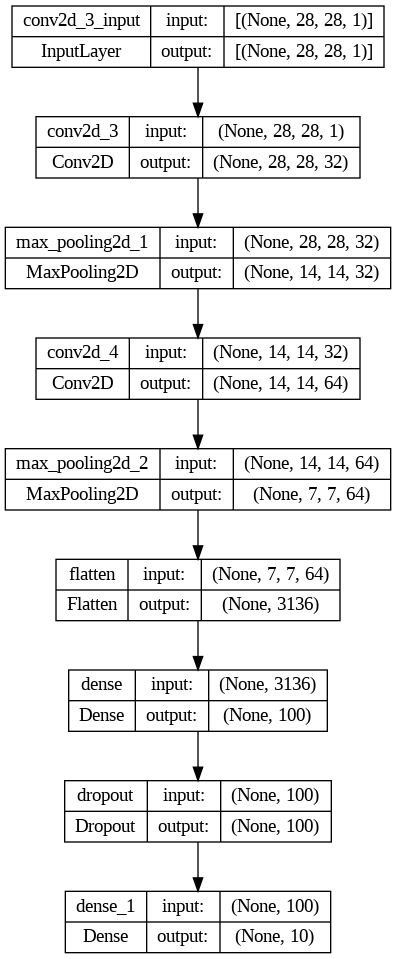

In [21]:
# plot_model() 함수의 show_shapes를 True 설정하면 입력과 출력의 크기를 표시해 줌
keras.utils.plot_model(model, show_shapes=True)

In [22]:
## 모델 컴파일과 훈련

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 12s 5ms/step - loss: 0.5568 - accuracy: 0.7977 - val_loss: 0.3382 - val_accuracy: 0.8762
Epoch 2/20
  25/1500 [..............................] - ETA: 6s - loss: 0.3328 - accuracy: 0.8763

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 6s 4ms/step - loss: 0.3740 - accuracy: 0.8670 - val_loss: 0.2920 - val_accuracy: 0.8937
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3206 - accuracy: 0.8852 - val_loss: 0.2614 - val_accuracy: 0.9014
Epoch 4/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2877 - accuracy: 0.8961 - val_loss: 0.2438 - val_accuracy: 0.9100
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2604 - accuracy: 0.9059 - val_loss: 0.2431 - val_accuracy: 0.9132
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2420 - accuracy: 0.9124 - val_loss: 0.2380 - val_accuracy: 0.9109
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2225 - accuracy: 0.9183 - val_loss: 0.2260 - val_accuracy: 0.9188
Epoch 8/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2073 - accuracy: 0.9236 - val_loss: 0.2324 - val_accuracy: 0.9187
Epo

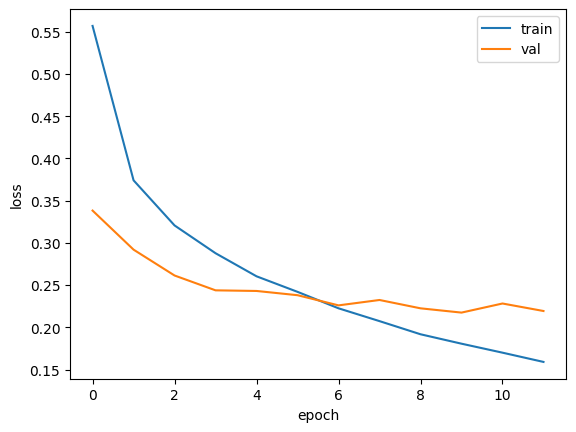

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [25]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2174 - accuracy: 0.9212


[0.21743924915790558, 0.9211666584014893]

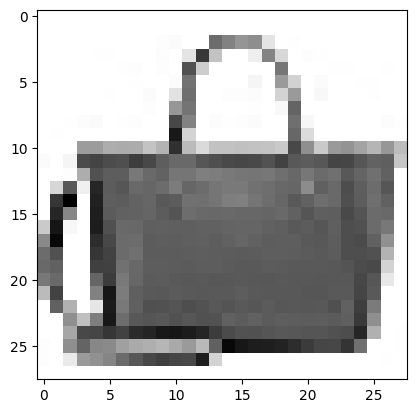

In [26]:
# 새로운 데이터에 대해 예측을 만들어보자
# 임시로 검증세트의 첫 샘플을 사용하겠음
# (28, 28, 1) 의 크기를 (28, 28)로 바꾸어야함
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [27]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 275ms/step
[[3.7688669e-23 3.6370614e-37 4.7086817e-30 8.6233190e-27 7.1040257e-25
  9.1228021e-23 3.6205158e-24 6.0566281e-26 1.0000000e+00 1.4035178e-22]]


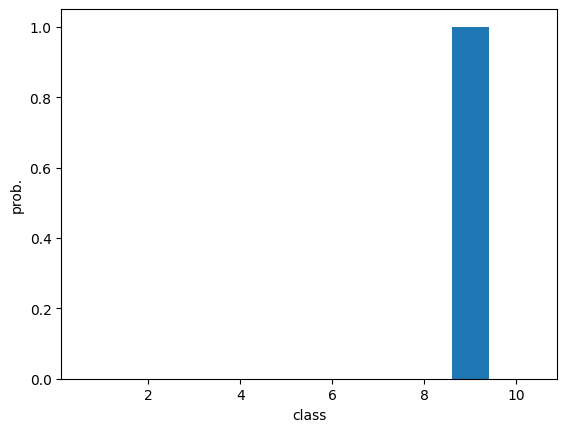

In [28]:
# 결과를 보면 9번째 클래스가 1이고 나머지는 0에 가까움
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [29]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클부츠']

In [30]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [31]:
# 성능 테스트
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [32]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2443 - accuracy: 0.9162


[0.2443332076072693, 0.9161999821662903]

# 08 - 3

In [33]:
# 합성곱 신경망은 이미지에 있는 특징을 찾아 압축하는데 성능이 좋음

In [34]:
## 가중치 시각화

In [35]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [36]:
# 모델의 레이어는 리스트 형식으로 저장되어있음
model.layers

In [37]:
# 첫 번째 합성곱 층의 가중치 조사
# 층의 가중치와 절편은 weights 속성에 저장되어 있음
# 첫 번째 원소는 가중치, 두 번째 원소는 절편
conv = model.layers[0]
conv.weights[0].shape, conv.weights[1].shape
# 커널의 크기는 3, 3, 1이고 필터 개수가 32 이므로 3, 3, 1, 32 이고
# 필터마다 1개의 절편이 있으므로 절편의 개수는 32개

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [38]:
# 가중치 배열의 평균과 표준편차 계산
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.045899455 0.30332756


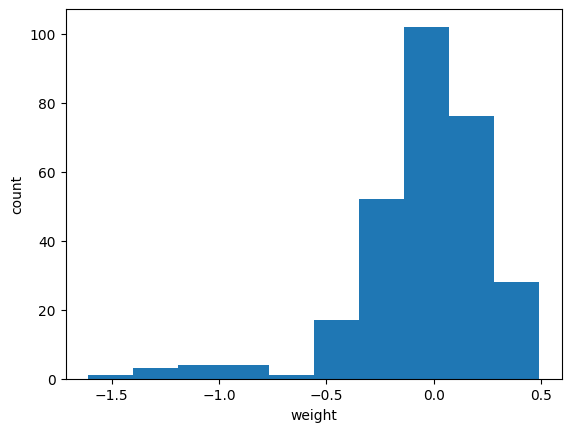

In [39]:
# 분포를 그래프로 표현
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

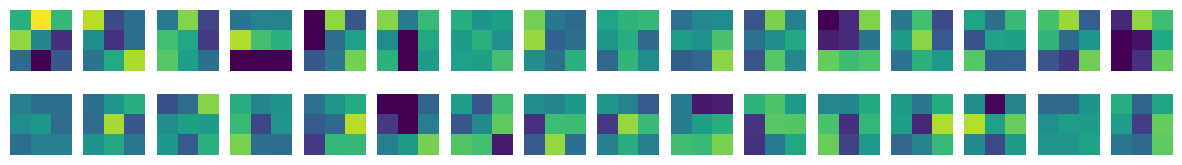

In [40]:
# 32개의 커널을 16개씩 두 줄에 출력
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [41]:
# imshow() 함수는 배열에 있는 최댓값과 최솟값을 사용해 픽셀을 강도를 표현함

In [42]:
# 훈련하지 않은 빈 합성곱 신경망을 만들고 위와 비교해 보겠음
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same',input_shape=(28,28,1)))

In [44]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [45]:
no_training_weights = no_training_conv.weights[0].numpy()
no_training_weights.mean(), no_training_weights.std()

(0.012774114, 0.08065734)

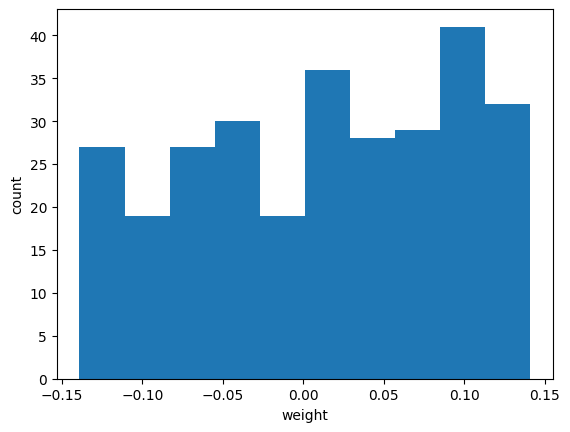

In [46]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

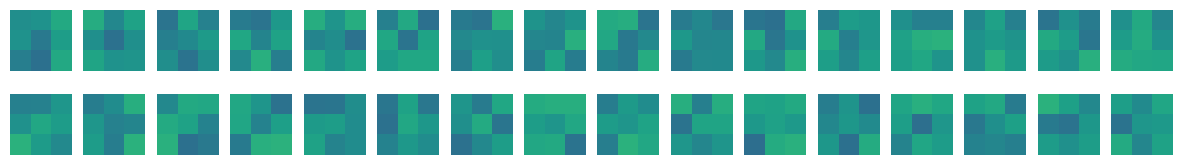

In [47]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [48]:
# 특출나게 밝은 부분이 없이 밋밋함

In [49]:
## 함수형 API

In [50]:
# 예를 들어 입력이 2개고 출력이 2개인 경우에는 Sequential() 클래스로 표현하기 힘듬
# 그래서 사용하는 것이 함수형 API

In [51]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

In [56]:
# 이번엔 Sequential() 클래스의 add() 메서드를 사용하지 않고 함수처럼 호출
# hidden = dense1(inputs)
# outputs = dense2(hidden)
# model = keras.Model(inputs, outputs)
# 그럼 여기서 inputs은 어디에?

In [57]:
# 케라스는 InputLayer 클래스 객체를 쉽게 다룰 수 있도록 Input() 함수를 제공
# inputs = keras.Input(shape=(784,))

In [ ]:
# inputs -> hidden -> outputs -> model 로 가서 model의 (inputs, outputs)이 된다.
# 이렇게 모델을 만들면 중간에 다양한 형태로 층을 연결할 수 있으며
# model 객체의 input과 Conv2D의 출력을 알면 이 둘을 통해 새로운 모델도 얻을 수 있을 것이다.

In [58]:
# model 객체의 입력 얻기
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_3_input'), name='conv2d_3_input', description="created by layer 'conv2d_3_input'")


In [59]:
# 구한 inputs과 Conv2D의 출력을 얻어서 새로운 모델을 만들기
conv_acti = keras.Model(model.input, model.layers[0].output)

In [60]:
## 특성 맵 시각화

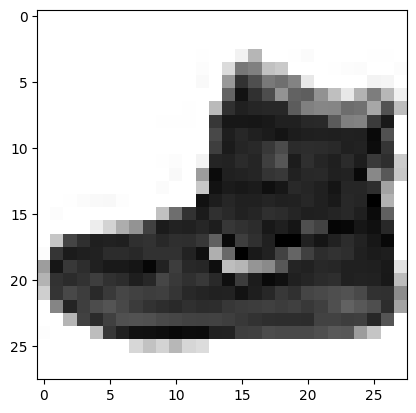

In [61]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [62]:
# 위에서 새로 만든 모델의 predict를 위해서 전처리
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 129ms/step


In [63]:
print(feature_maps.shape)

(1, 28, 28, 32)


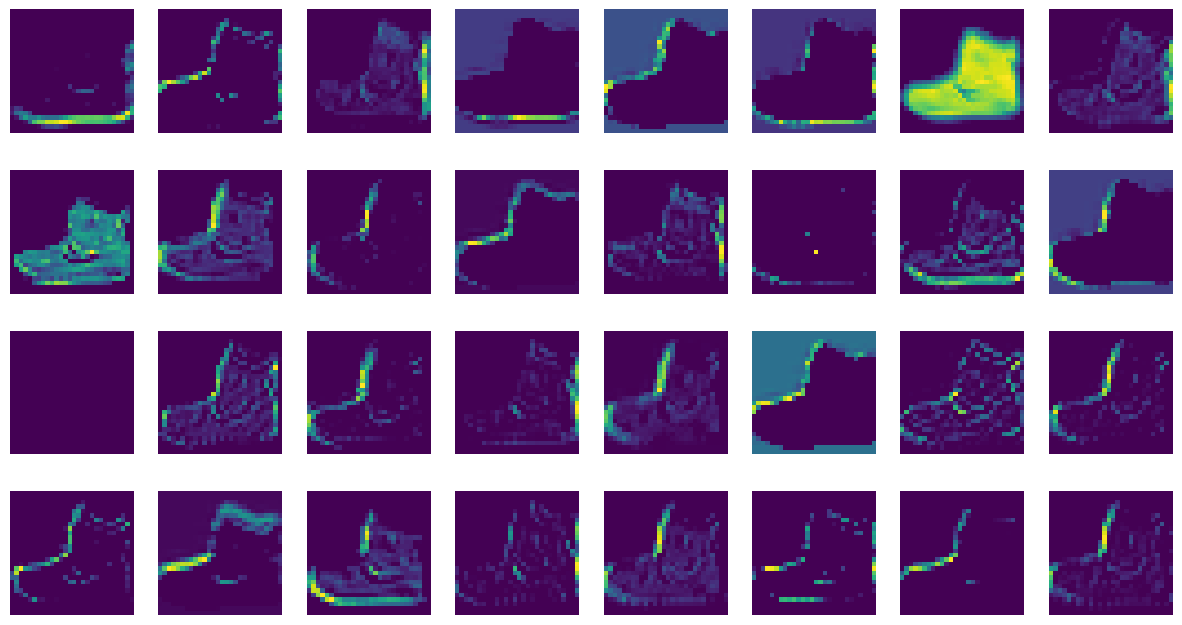

In [64]:
# 세임 패딩과 32개의 필터를 사용했기에 (28, 28, 32) 임
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()

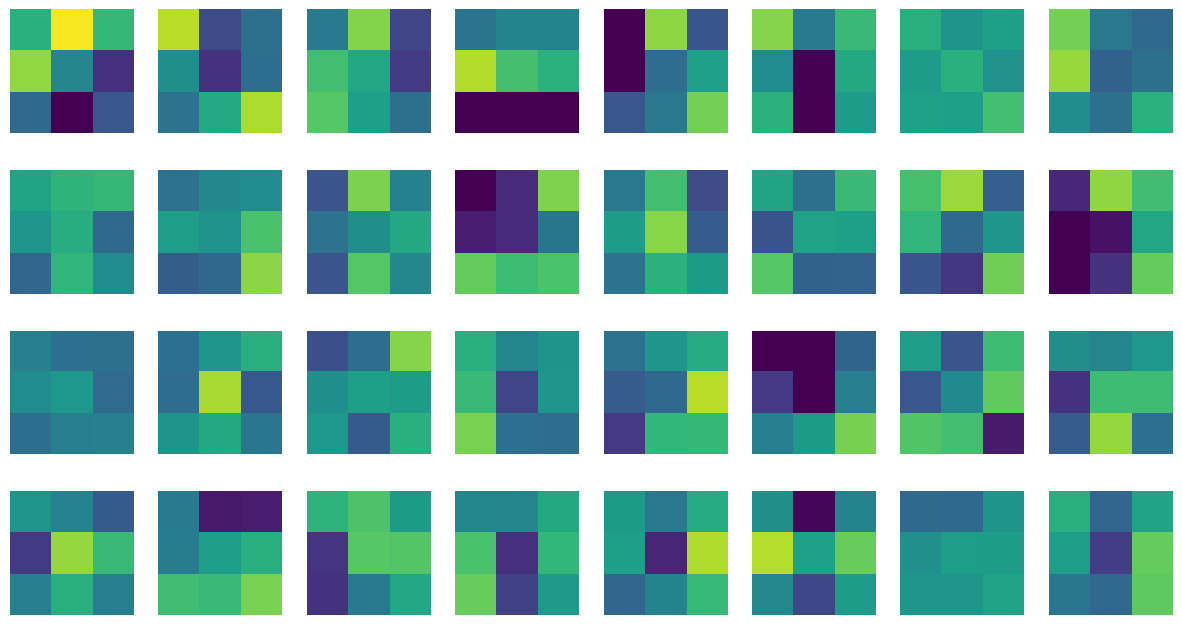

In [68]:
# 비교해보자
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(conv_weights[:,:,0,i*8 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [69]:
# 두 번째 합성곱 층이 만든 특성 맵도 확인
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [70]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 375ms/step


In [71]:
# 풀링으로 가로 세로의 길이가 절반으로 줄었고, 필터 개수 64개만큼 증가
feature_maps.shape

(1, 14, 14, 64)

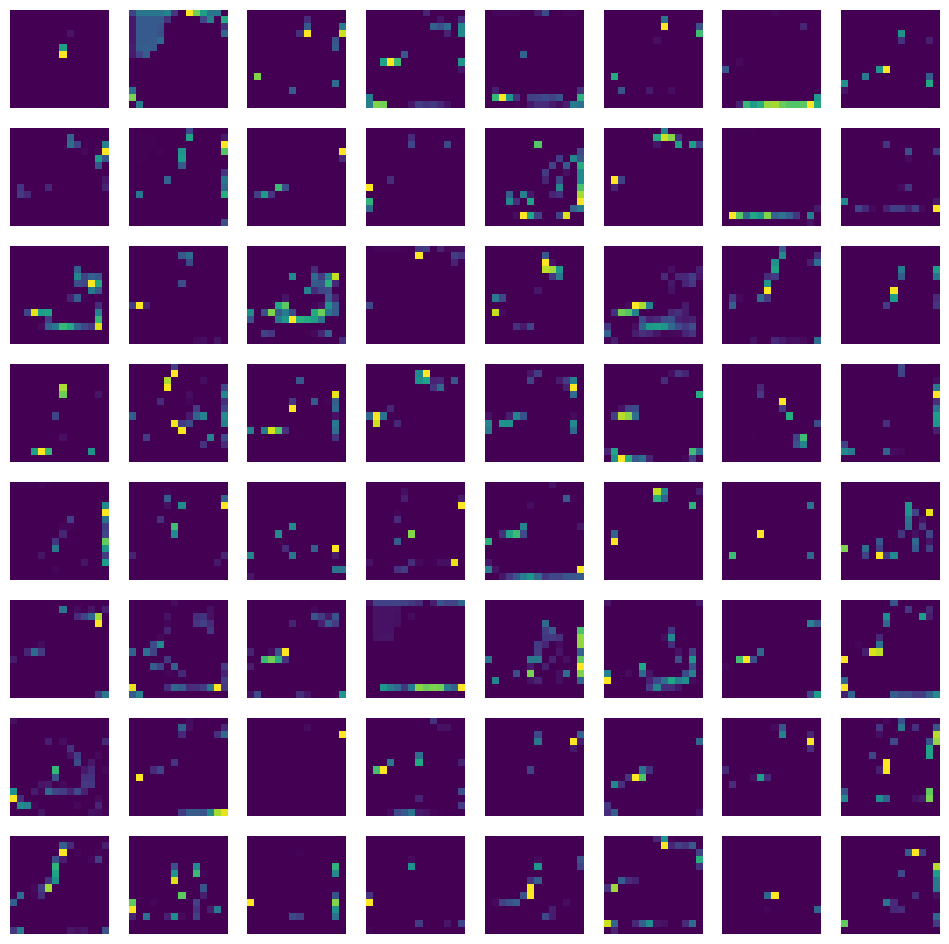

In [72]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()

In [73]:
# 뭐가 뭔지 잘..
# 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고
# 뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습